In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
from sklearn import preprocessing

In [2]:
data_df = pd.read_csv('India_Key_Commodities_Retail_Prices_1997_2015.csv')


In [3]:
data_df.head()

,Date,Centre,Commodity,Price per Kg,Region,Country
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA


In [4]:
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%d-%m-%Y' )


In [5]:
data_df['Year'] = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Day'] = data_df['Date'].dt.day

In [6]:
data_df.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Year,Month,Day
0,1997-11-25,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997,11,25
1,1997-11-25,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997,11,25
2,1997-11-25,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997,11,25
3,1997-11-25,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997,11,25
4,1997-11-25,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997,11,25


In [7]:
data_df.drop(['Date'],axis=1,inplace=True)

In [8]:
list1 = list

,Centre,Commodity,Price per Kg,Region,Country,Year,Month,Day
0,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997,11,25
1,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997,11,25
2,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997,11,25
3,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997,11,25
4,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997,11,25


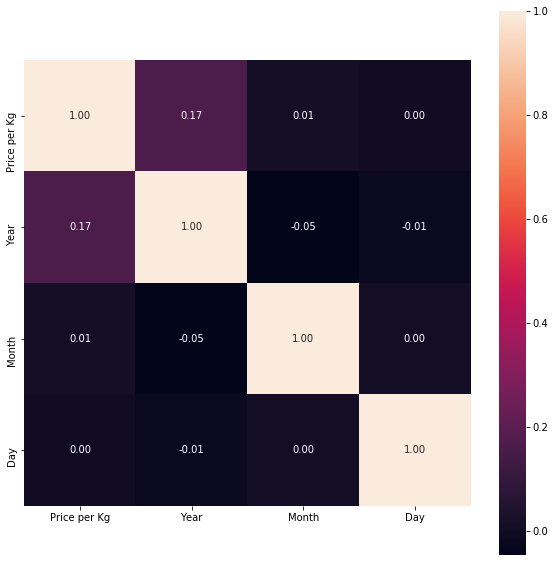

In [9]:
#correlation
correlations = data_df.corr()

#visualization 
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In [10]:
encode1 = preprocessing.LabelEncoder()
encode1.fit(data_df.Region.unique())
data_df['Region_Encoded'] = encode1.transform(data_df.Region)
data_df.drop(['Region'], axis=1, inplace=True)

cols = data_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_df = data_df[cols]

    # Encoding categorical data(commodity)
    # from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encode2 = preprocessing.LabelEncoder()
encode2.fit(data_df.Commodity.unique())
data_df['Commodity_Encoded'] = encode2.transform(data_df.Commodity)
data_df.drop(['Commodity'], axis=1, inplace=True)

cols = data_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_df = data_df[cols]


    # Encoding categorical data(center)
    # from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encode3 = preprocessing.LabelEncoder()
encode3.fit(data_df.Centre.unique())
data_df['Centre_Encoded'] = encode3.transform(data_df.Centre)
data_df.drop(['Centre'], axis=1, inplace=True)

cols = data_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_df = data_df[cols]



In [11]:
data_df.head()

,Centre_Encoded,Commodity_Encoded,Region_Encoded,Price per Kg,Country,Year,Month,Day
0,39,8,1,15.0,INDIA,1997,11,25
1,8,8,4,18.0,INDIA,1997,11,25
2,30,8,4,20.0,INDIA,1997,11,25
3,61,8,1,21.5,INDIA,1997,11,25
4,2,8,4,21.5,INDIA,1997,11,25


In [12]:
data_df.drop(['Country'], axis = 1, inplace = True)

In [13]:
data_df.head()

,Centre_Encoded,Commodity_Encoded,Region_Encoded,Price per Kg,Year,Month,Day
0,39,8,1,15.0,1997,11,25
1,8,8,4,18.0,1997,11,25
2,30,8,4,20.0,1997,11,25
3,61,8,1,21.5,1997,11,25
4,2,8,4,21.5,1997,11,25


In [14]:
X = data_df.iloc[:,0:3]
y = data_df.iloc[:,3:4]

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  


In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor= regressor.fit(X_train, y_train.ravel())

In [17]:
model_score_test = round(regressor.score(X_test, y_test.ravel()) * 100, 2)
model_score_test

90.55

In [18]:
final_feature = []

center = "LUCKNOW"
final_feature.append(int(encode3.transform([center])))
  
commodity = "Tea Loose"
final_feature.append(int(encode2.transform([commodity])))
    
region = "WEST"
final_feature.append(int(encode1.transform([region])))
   


In [19]:
final_feature = sc_X.transform(np.array(final_feature).reshape(1,-1))
prediction = regressor.predict(final_feature)


In [20]:

print(sc_y.inverse_transform(prediction))

[172.03752549]
